In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stat
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
dataset = pd.read_csv('AB_Test_Results.csv')
dataset

,USER_ID,VARIANT_NAME,REVENUE
0,737,variant,0.0
1,2423,control,0.0
2,9411,control,0.0
3,7311,control,0.0
4,6174,variant,0.0
...,...,...,...
9995,1981,control,0.0
9996,502,variant,0.0
9997,9214,variant,0.0
9998,7741,control,0.0


In [3]:
dataset = dataset.rename(lambda x: x.lower(), axis='columns')
dataset

,user_id,variant_name,revenue
0,737,variant,0.0
1,2423,control,0.0
2,9411,control,0.0
3,7311,control,0.0
4,6174,variant,0.0
...,...,...,...
9995,1981,control,0.0
9996,502,variant,0.0
9997,9214,variant,0.0
9998,7741,control,0.0


1.Проанализируйте есть ли пользователи, которые попали в обе группы тестирования. Если да, то исключите их.

In [4]:
variant_dataset = dataset.loc[dataset.variant_name == 'variant'].user_id
variant_dataset

0        737
4       6174
5       2380
8       6205
13      2529
        ... 
9991    8864
9992    9303
9993    2400
9996     502
9997    9214
Name: user_id, Length: 5016, dtype: int64

In [5]:
control_dataset = dataset.loc[dataset.variant_name == 'control'].user_id
control_dataset

1       2423
2       9411
3       7311
6       2849
7       9168
        ... 
9988     428
9994    3129
9995    1981
9998    7741
9999    9468
Name: user_id, Length: 4984, dtype: int64

In [6]:
users_in_both_datasets = variant_dataset[variant_dataset.isin(control_dataset)].values

In [7]:
users_in_both_datasets.shape

(1972,)

Датасет из юзеров, которые есть в обоих выборках непустой -> нужно их убрать из нашего датасета с результатами AB - тестирования

In [8]:
dataset.drop(dataset[dataset.user_id.isin(users_in_both_datasets)].index, inplace=True)

In [9]:
dataset

,user_id,variant_name,revenue
0,737,variant,0.0
4,6174,variant,0.0
5,2380,variant,0.0
7,9168,control,0.0
9,7548,control,0.0
...,...,...,...
9993,2400,variant,0.0
9994,3129,control,0.0
9996,502,variant,0.0
9998,7741,control,0.0


2.Проанализируйте выбросы в данных с помощью диаграммы размаха («ящика с усами»). 
Поработайте с ними, чтобы исключить вероятность их влияния на результаты тестирования. 

<Axes: >

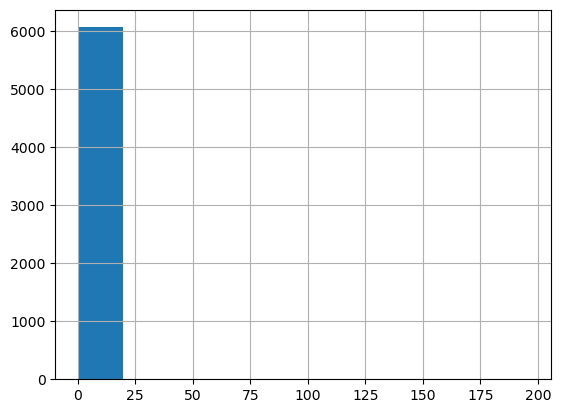

In [10]:
dataset.revenue.hist()

<Axes: xlabel='variant_name', ylabel='revenue'>

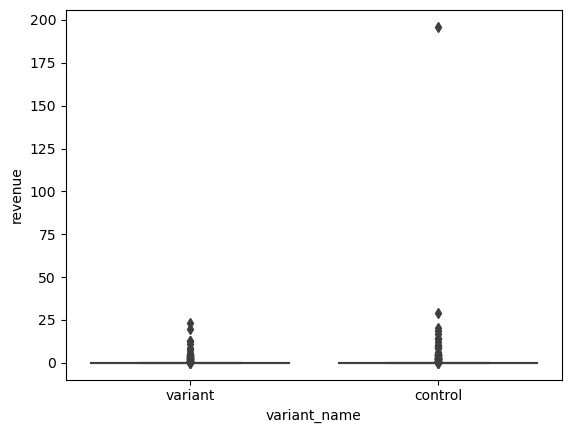

In [11]:
sns.boxplot(data=dataset, x='variant_name', y='revenue')

In [12]:
dataset.revenue.value_counts()

0.00     5973
1.25        6
4.27        3
2.99        3
4.33        3
         ... 
0.86        1
2.02        1
3.28        1
19.47       1
2.93        1
Name: revenue, Length: 70, dtype: int64

Поскольку ненулевых значений ничтожно мало, а для анализа они очень важны, то выбросом будем считать только значение около 200

Исключим это значение из выборки

In [13]:
dataset.drop(dataset[dataset.revenue == dataset.revenue.max()].index, inplace=True)

<Axes: xlabel='variant_name', ylabel='revenue'>

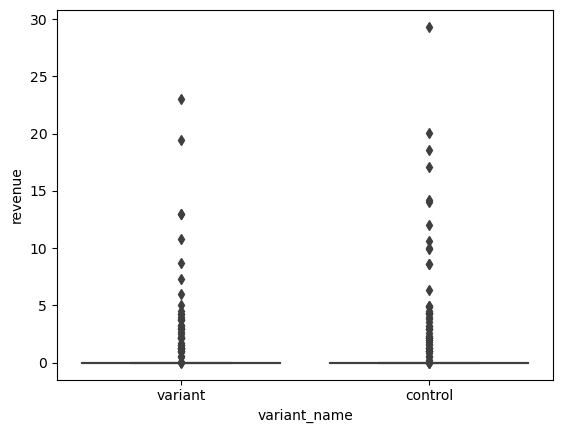

In [14]:
sns.boxplot(data=dataset, x='variant_name', y='revenue')

<Axes: >

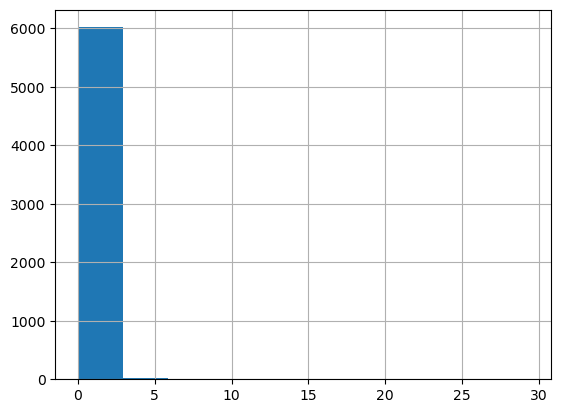

In [15]:
dataset.revenue.hist()

<Axes: >

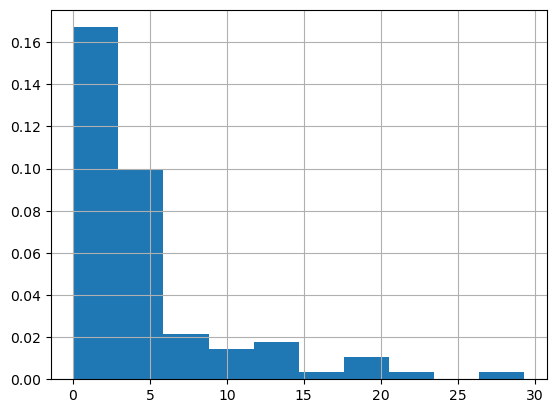

In [16]:
dataset[dataset.revenue > 0].revenue.hist(density=True) # распределение платящих пользователей

3.Исключите дубли в записях для одного и того же пользователя. 

In [17]:
dataset.user_id.value_counts()

5652    6
1782    5
1339    5
9396    4
1053    4
       ..
2924    1
293     1
9670    1
7401    1
9468    1
Name: user_id, Length: 4782, dtype: int64

In [18]:
dataset.drop_duplicates(subset=['user_id'], inplace=True)

In [19]:
dataset

,user_id,variant_name,revenue
0,737,variant,0.0
4,6174,variant,0.0
5,2380,variant,0.0
7,9168,control,0.0
9,7548,control,0.0
...,...,...,...
9988,428,control,0.0
9991,8864,variant,0.0
9996,502,variant,0.0
9998,7741,control,0.0


In [20]:
dataset.user_id.value_counts().sort_values(ascending=False)

737     1
9168    1
8395    1
1184    1
7165    1
       ..
428     1
8864    1
502     1
7741    1
9468    1
Name: user_id, Length: 4782, dtype: int64

Пользователей - дубликатов теперь нет

4. Используйте разные статистики для сравнения групп платящих и не платящих пользователей. 

In [21]:
paying_variant = dataset[(dataset.revenue > 0) & (dataset.variant_name == 'variant')].revenue
paying_variant

139      4.27
149      1.75
1257     3.75
1793     1.51
1901     3.98
2314     0.04
2482    23.04
2624     1.00
2702     8.70
2726    10.82
2920     2.72
3385     2.27
3513     2.14
4065     0.50
4374     5.08
4561    12.99
4575     2.16
4711     3.28
5212    12.99
5217    19.47
5751     2.50
5924     3.83
6843     2.95
7151     7.27
7221     1.25
7500     0.90
7949     2.99
8227     1.30
8301     5.98
8838     0.02
8912     1.23
9112     2.17
9139     0.60
9977     1.01
Name: revenue, dtype: float64

In [22]:
paying_control = dataset[(dataset.revenue > 0) & (dataset.variant_name == 'control')].revenue
paying_control

49       3.25
152      2.99
333      9.91
628     10.63
758     17.05
853      2.17
1024     1.25
1148     4.87
1468    11.98
1530     1.56
1818     3.99
2583     2.01
2698     4.27
2759     4.95
2974     0.02
3298     1.01
3740     8.66
4031    14.24
4096     0.86
4217     2.02
4454     4.33
4991     0.50
5430     1.00
5709     1.25
6167     2.99
6378     1.25
6483     9.99
6515     2.34
6786     2.17
7050     2.16
7140     0.02
7471     2.60
7568     8.66
8129     6.35
9019    14.07
9241     0.58
9327     1.66
9466     1.78
9711     2.93
Name: revenue, dtype: float64

In [23]:
paying_variant.shape[0]

34

In [28]:
paying_control.shape[0]

39

In [29]:
U, p = stat.mannwhitneyu(x=paying_variant, y=paying_control)
U, p

(648.0, 0.8725765189590362)

При уровне значимости 5 % различия не являются статистически достоверными и носят случайный характер 

5. Проверьте распределение на нормальность, используя разные статистические тесты (Шапиро-Уилка, Манна-Уитни, бутстраппинг и т.д.)

In [30]:
stat.shapiro(paying_control)

ShapiroResult(statistic=0.8174775838851929, pvalue=1.966639501915779e-05)

In [31]:
stat.shapiro(paying_variant)

ShapiroResult(statistic=0.7321643829345703, pvalue=1.593363776919432e-06)

По результатам теста Шапиро-Уилка при уровне значимости 5 % можно отвергнуть гипотезу 
о нормальности распределения платящих клиентов в variant и control

6.Сделайте выводы по результатам A/B-тестирования.

По результатам A/B тестирования можно сделать вывод, что при уровне значимости 5 % различия не являются статистически достоверными и носят случайный характер 